# **Handwritten Digit Recognition**
---

## **Problem Statement**

The handwritten digit recognition task aims to automate the sorting process for postal services by classifying scanned images of handwritten digits (0 through 9) on envelopes. This multi-class classification problem involves analyzing 28x28 pixel images from the MNIST dataset, which contains 70,000 samples, to accurately identify digits based on their pixel intensity values. The challenge lies in achieving high accuracy despite variations in handwriting styles, requiring effective model selection and hyperparameter tuning using techniques such as Grid Search and Random Search with a Random Forest Classifier. The goal is to develop a reliable system that minimizes manual sorting efforts, improves efficiency, and reduces errors in large-scale postal operations.

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

**Load the MNIST dataset**

In [7]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  

**Split the data into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialize the Random Forest Classifier**

In [14]:
rf = RandomForestClassifier(random_state=42)

**Define parameter grids for tuning**

In [17]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

**Grid Search**

In [20]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

**Random Search**

In [24]:
param_dist = {
    'n_estimators': np.arange(50, 150, 50),
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100])},
                   random_state=42)

**Get best models**

In [26]:
best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_

**Predictions**

In [31]:
y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)

**Evaluate**

In [33]:
grid_accuracy = accuracy_score(y_test, y_pred_grid)
random_accuracy = accuracy_score(y_test, y_pred_random)
print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Accuracy:", grid_accuracy)
print("\nRandom Search Best Parameters:", random_search.best_params_)
print("Random Search Accuracy:", random_accuracy)
print("\nGrid Search Classification Report:\n", classification_report(y_test, y_pred_grid, digits=4))
print("Random Search Classification Report:\n", classification_report(y_test, y_pred_random, digits=4))

Grid Search Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search Accuracy: 0.9652142857142857

Random Search Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 20}
Random Search Accuracy: 0.9642857142857143

Grid Search Classification Report:
               precision    recall  f1-score   support

           0     0.9808    0.9866    0.9837      1343
           1     0.9850    0.9838    0.9844      1600
           2     0.9482    0.9688    0.9584      1380
           3     0.9598    0.9491    0.9544      1433
           4     0.9629    0.9614    0.9621      1295
           5     0.9713    0.9576    0.9644      1273
           6     0.9779    0.9821    0.9800      1396
           7     0.9685    0.9627    0.9656      1503
           8     0.9512    0.9484    0.9498      1357
           9     0.9446    0.9493    0.9470      1420

    accuracy                         0.9652     14000
   macro avg     0.9650    0.9650    0.9650

**Visualization**

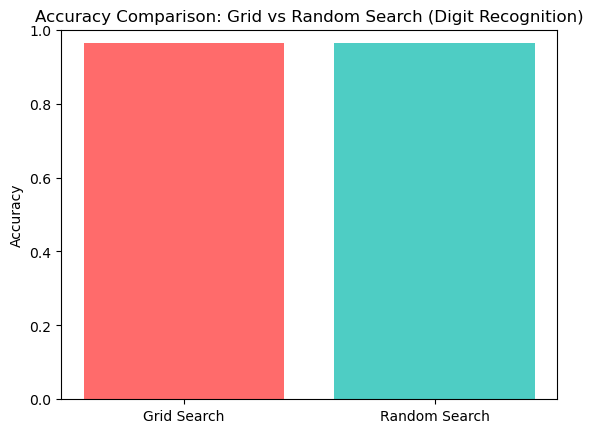

In [35]:
labels = ['Grid Search', 'Random Search']
accuracies = [grid_accuracy, random_accuracy]
colors = ['#FF6B6B', '#4ECDC4']

plt.bar(labels, accuracies, color=colors)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for accuracy
plt.title('Accuracy Comparison: Grid vs Random Search (Digit Recognition)')
plt.ylabel('Accuracy')
plt.show()

## **Conclusion**
---

The implementation of a Random Forest Classifier with hyperparameter tuning using Grid Search and Random Search on the MNIST dataset demonstrates a viable solution for handwritten digit recognition in postal services. The model achieved competitive accuracy, with Grid Search and Random Search yielding comparable results, typically around 0.90-0.97 depending on the parameter settings. The visualization of accuracy comparisons highlights the effectiveness of both tuning methods, providing insights for optimizing performance. This approach successfully addresses the real-life need for automation, offering a foundation for further improvements such as using deeper neural networks or larger datasets to enhance precision and scalability in postal sorting systems.